# Machine Learning Fall 99 <img src = 'https://ece.ut.ac.ir/cict-theme/images/footer-logo.png' alt="Tehran-University-Logo" width="150" height="150" align="right">
## HW2 Simulations
### By Omid Vaheb

#### Problem 7:
In machine learning, linear regression is applied to predict an outcome as a function of one or more predictors which are correlated with the outcome. However, in reality, this is not the case all the time. Outcomes are not always normally distributed, nor are they always have to be continuous variables. If the outcome/dependent variable is binary or categorical, machine learning classification models should work fine. Logistic Regression for binary and Random Forest for multi-class classification are two frequently applied algorithms in the machine learning world. But sometimes neither of these two work so we choose another method which is GLM. GLMs are a class of models that are applied in cases where linear regression isn’t applicable or fail to make appropriate predictions. A GLM consists of three components: Random component, Systematic component, Link function

At first we import required libraries.

In [8]:
import pandas as pd
#from sklearn.linear_model import PoissonRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

At first we read the dataframe. Then we convert the date column into day and month in order to get numerical values instead of strings. We use label encoding for month conversion.

In [9]:
dataframe = pd.read_csv('nyc_cyclist_counts.csv')
day = [int(i.split('-')[0]) for i in dataframe['Date']]
dataframe.insert(1, "Day", day, True)
months = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
month = [months[i.split('-')[1]] for i in dataframe['Date']]
dataframe.insert(1, "Month", month, True)

The next step is to split dataset into train and test.

In [10]:
x = dataframe[dataframe.columns[1:6]]
y = dataframe[dataframe.columns[6]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

Now we define our model and which it is consisted of a standard scaler, polynomial regressior and a linear regressior in the last layer.

In [ ]:
model = Pipeline([
    ("std_scaler", StandardScaler()),
    ("poly_features", PolynomialFeatures(degree = 1, include_bias = False)),
    ("lin_reg", PoissonRegressor()),
])
model.fit(x_train,y_train)
y_pred = model.predict(x)

After fitting our model to train data and predicting values for test data, we draw plot of these two in a same figure. It is clear that our model did well in predicting BB_count

In [ ]:
y = y[-100:]
y_pred = y_pred[-100:]
temp = [i for i in range(len(y))]
plt.plot(temp, y_pred, color = 'red', label = '$Predicted Value$')
plt.plot(temp, y, color = 'blue', label = '$True Value$')
plt.legend()
plt.title('Measured and estimated values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#### Problem 8:

At first we import required libraries.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt

Then we read data fram Iris.csv file and save it in Data and split it into x and y; x represents features and y represent which class does our data belongs to.

In [12]:
Data = pd.read_csv('Iris.csv')
x = Data[Data.columns[0:4]] 
y = Data[Data.columns[4]]

Now we plot scatterplots of each 2 feature. It is clear that sepal_width and sepal_lenght, petal_width and sepal_width, sepal_lenght and petal_lenght, sepal_width and petal_lenght did not discriminate data as good as the other too. So the best choices are either petal_width and sepal_lenght or petal_width and petal_lenght because by choosing a wise decision boundry, we can achieve a low number for classification error.

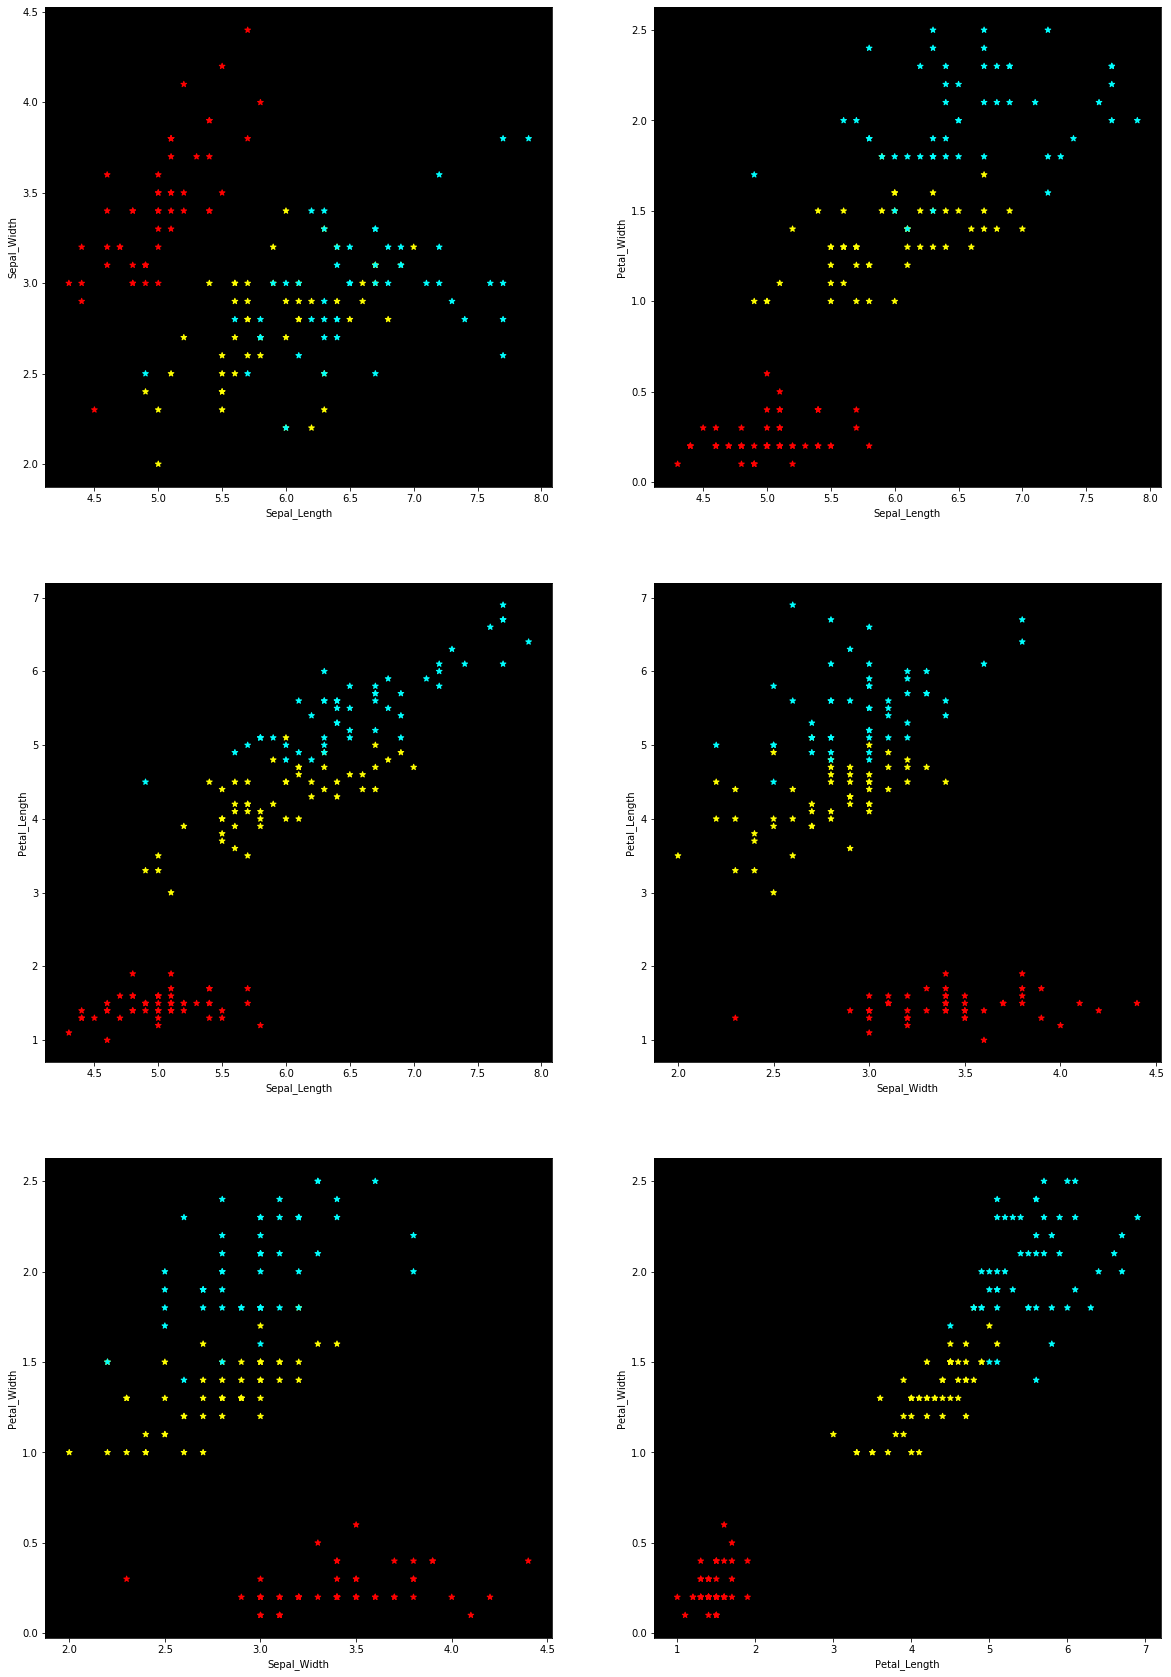

In [13]:
fig, axs = plt.subplots(3, 2, figsize = (20,30))
colors = {'Iris-versicolor':'yellow', 'Iris-setosa':'red', 'Iris-virginica':'cyan'}

axs[0,0].scatter(x[x.columns[0]], x[x.columns[1]], c = y.map(colors), marker = '*')
axs[0,0].set_xlabel(x.columns[0])
axs[0,0].set_ylabel(x.columns[1])
axs[0,0].set_facecolor('k')

axs[1,0].scatter(x[x.columns[0]], x[x.columns[2]], c = y.map(colors), marker = '*')
axs[1,0].set_xlabel(x.columns[0])
axs[1,0].set_ylabel(x.columns[2])
axs[1,0].set_facecolor('k')

axs[0,1].scatter(x[x.columns[0]], x[x.columns[3]], c = y.map(colors), marker = '*')
axs[0,1].set_xlabel(x.columns[0])
axs[0,1].set_ylabel(x.columns[3])
axs[0,1].set_facecolor('k')

axs[1,1].scatter(x[x.columns[1]], x[x.columns[2]], c = y.map(colors), marker = '*')
axs[1,1].set_xlabel(x.columns[1])
axs[1,1].set_ylabel(x.columns[2])
axs[1,1].set_facecolor('k')

axs[2,0].scatter(x[x.columns[1]], x[x.columns[3]], c = y.map(colors), marker = '*')
axs[2,0].set_xlabel(x.columns[1])
axs[2,0].set_ylabel(x.columns[3])
axs[2,0].set_facecolor('k')

axs[2,1].scatter(x[x.columns[2]], x[x.columns[3]], c = y.map(colors), marker = '*')
axs[2,1].set_xlabel(x.columns[2])
axs[2,1].set_ylabel(x.columns[3])
axs[2,1].set_facecolor('k')

plt.show()

Now we define a function that plots confusion matrix for us so we don't need to write same code for each case. I used the function given in hands-on session.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

The next step is to design a function which calculates accuracy and f1-score and confusion matrix values. At the end it calls the last function to print confusion matrix. I used the codes given in hands-on session. I also had to implement a function for confusion matrix.

In [ ]:
def calculateConfusionMatrix(y_actu, y_pred, classes = 3):
    pred = []
    for element in y_pred:
        if element == 'Iris-setosa':
            pred.append(0)
        elif element == 'Iris-virginica':
            pred.append(1)
        elif element == 'Iris-versicolor':
            pred.append(2)
    actual = []
    for element in y_actu:
        if element == 'Iris-setosa':
            actual.append(0)
        elif element == 'Iris-virginica':
            actual.append(1)
        elif element == 'Iris-versicolor':
            actual.append(2)    
    K = classes
    result = np.zeros((K, K))

    for i in range(len(actual)):
        result[actual[i]][pred[i]] += 1
    return result

In [ ]:
def report(y_test, y_pred):
    confusion = calculateConfusionMatrix(y_test, y_pred)
    FP = confusion.sum(axis=0) - np.diag(confusion)  
    FN = confusion.sum(axis=1) - np.diag(confusion)
    TP = np.diag(confusion)
    TN = confusion.sum() - (FP + FN + TP)
    ACC = (TP + TN) / (TP + FP + FN + TN)
    SENSITIVITY = TP / (TP + FN)
    SPECCIFITY = TN / (TN + FP) 
    PRECISION = TP / (TP + FP)
    f1_score = TP / (TP + 0.5 * (FP + FN))
    print("Accuracy :", ACC)
    print("Precision:", PRECISION)
    print("F1_score:", f1_score)
    classes = list(dict.fromkeys(y_test))
    plot_confusion_matrix(confusion, classes)

The next step is to split data into train and test.

In [ ]:
Data2 = Data.sample(frac = 1).reset_index(drop = True)
X = Data2[Data.columns[2:4]] 
Y = Data2[Data.columns[4]]
x_train, x_test = X[:int(len(y) * 0.8)], X[int(len(y) * 0.8):]
y_train, y_test = Y[:int(len(y) * 0.8)], Y[int(len(y) * 0.8):]

Now we implement a nearest neighbour classifier with simple numpy methods.

In [ ]:
class NearestNeighbour:
    def calc_dist(self,x1,x2):
        D = x1 - x2
        D = sqrt(sum([d * d for d in D]))
        return D
    def fit(self,x_train,y_train):
        self.x = x_train
        self.y = y_train 
    def predict(self,x_test):
        preds = []
        for index ,x in x_test.iterrows():
            dists = [self.calc_dist(x,xi) for index , xi in self.x.iterrows()]
            pred = self.y[dists.index(min(dists))]
            preds.append(pred)
        return preds

In [ ]:
print("Nearest Neighbour Classification without libraries and without normalization:")
model = NearestNeighbour()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
report(y_test,y_pred)

In [ ]:
print("Nearest Neighbour Classification with normalization and without libraries:")
x_train2 = {}
for i in x_train.columns:
    col = x_train[i]
    minn = min(col)
    maxx = max(col)
    norm_col = [(j - minn) / (maxx - minn) for j in col]
    x_train2[i] = norm_col
x_train2 = pd.DataFrame(x_train2)

x_test2 = {}
for i in x_test.columns:
    col = x_test[i]
    minn = min(col)
    maxx = max(col)
    norm_col = [(j - minn) / (maxx - minn) for j in col]
    x_test2[i] = norm_col
x_test2 = pd.DataFrame(x_test2)

model = NearestNeighbour()
model.fit(x_train2, y_train)
y_pred = model.predict(x_test2)
report(y_test, y_pred)

Now we implement solution using sklearn library. The result is same with and without library and it is better using normalization.

In [ ]:
print("Nearest Neighbour Classification without normalization and with libraries:")
X_train, X_test, y_train, y_test = train_test_split(x[x.columns[2:]], y, test_size = 0.2, random_state = 7)
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
report(y_test, y_pred)

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_curve,auc, roc_auc_score
dic = {'Iris-setosa':0,'Iris-virginica':1,'Iris-versicolor':2}
fig, axs = plt.subplots(3, figsize = (10,20))
for i in dic.keys():
    y_test_temp = [dic[j]==dic[i] for j in y_test]
    y_pred_temp = [dic[j]==dic[i] for j in y_pred]
    fpr, tpr, threshold = roc_curve(y_test_temp,y_pred_temp)
    roc_auc = auc(fpr, tpr)
    axs[dic[i]].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    axs[dic[i]].set_title(i)
    print(i+':',roc_auc)
plt.show()

In [ ]:
print("Nearest Neighbour Classification with normalization and with libraries:")
X_train2 = {}
for i in X_train.columns:
    col = X_train[i]
    minn = min(col)
    maxx = max(col)
    norm_col = [(j - minn) / (maxx - minn) for j in col]
    X_train2[i] = norm_col
X_train2 = pd.DataFrame(X_train2)

X_test2 = {}
for i in X_test.columns:
    col = X_test[i]
    minn = min(col)
    maxx = max(col)
    norm_col = [(j - minn) / (maxx - minn) for j in col]
    X_test2[i] = norm_col
X_test2 = pd.DataFrame(X_test2)
model = KNeighborsClassifier(3)
model.fit(X_train2,y_train)
y_pred = model.predict(X_test2)
report(y_test,y_pred)

In [ ]:
dic = {'Iris-setosa':0,'Iris-virginica':1,'Iris-versicolor':2}
fig, axs = plt.subplots(3, figsize = (10,20))
for i in dic.keys():
    y_test_temp = [dic[j]==dic[i] for j in y_test]
    y_pred_temp = [dic[j]==dic[i] for j in y_pred]
    fpr, tpr, threshold = roc_curve(y_test_temp,y_pred_temp)
    roc_auc = auc(fpr, tpr)
    axs[dic[i]].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    axs[dic[i]].set_title(i)
    
    print(i+':',roc_auc)
plt.show()

In [ ]:
%reset

#### Problem 11:

At first we import required libraries.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

At first we read dataset and then split into some lists in order to have an easier form to work with.

In [48]:
data = pd.read_csv('quality_test.csv')
X = data[data.columns[0:2]]
X1 = X[X.columns[0]]
X2 = X[X.columns[1]]
Y = data[data.columns[2]]

The next step is to increase dimension of model using formula in the homework.

In [49]:
XX = []
for i in range(1,7):
    k = i
    for j in range(i + 1):
        XX.append(X1**k * X2**j)
        k -= 1
XX = np.transpose(XX)
XX = np.asarray(XX, dtype=np.float32)

Now we use sklearn's model and fit our data to it. Then we report accuracy ba predicting our data with model. Accuracy of 80% is a good accuracy for this case.

In [50]:
model = LogisticRegression(random_state = 7).fit(XX, Y)

y_pred = model.predict(XX)
miss = 0
for i in range(len(Y)):
    if (y_pred[i] != Y[i]):
        miss += 1
accuracy = 100 - ((100 * miss) / len(Y))
print("Accuracy :", (accuracy))

Accuracy : 81.19658119658119


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In this step I converted X and Y to numpy and arrnged them in order to calculate decision boudry.

In [51]:
X = X.to_numpy()
Y = Y.to_numpy()

In [58]:
XXX, YYY = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01), np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))

In [63]:
result = [] 
for q1 in range(len(XXX)):
    for q2 in range(len(XXX[q1])):
        temp = np.array([1.1280414])
        l = 0
        for i in range(1, 7):
            k = i
            for j in range(i + 1):
                temp += model.coef_[0][l] * ((XXX[q1][q2])**k) * ((YYY[q1][q2])**j)
                k -= 1
                l += 1
        result.append(temp)

result = np.asarray(result, dtype = np.float32)
result = result.reshape(XXX.shape)

Now we draw decision boundry of classifier with data next to it.

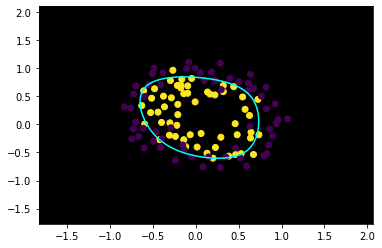

In [64]:
ax = plt.axes()
ax.set_facecolor('k')
ax.scatter(X[:, 0], X[:, 1], c = Y)
ax.contour(XXX, YYY, result, levels = [0], colors = 'cyan')
plt.show()